
### Wine Quality
#### Author: Emmanuel Mukadi 

### `This section is ONLY about understanding the raw data.`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Loading the data
df = pd.read_csv('../data/winequality-all.csv')
print("Initial Shape:",df.shape) 
df.head()

Initial Shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# Information about the Dataset
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6493 non-null   float64
 6   total sulfur dioxide  6495 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     4
total sulfur dioxide    2
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Class distribution in the dataset:
type
red      1599
white    4898
Name: count, dtype: int64


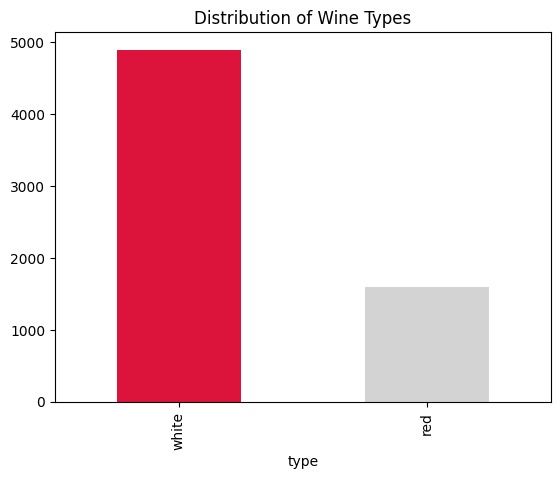

In [4]:
# Class Distribution
df['type'].value_counts().plot(kind='bar', color=['crimson', 'lightgrey'], title='Distribution of Wine Types')
target_counts = df['type'].value_counts().sort_index()
print("Class distribution in the dataset:")
print(target_counts)

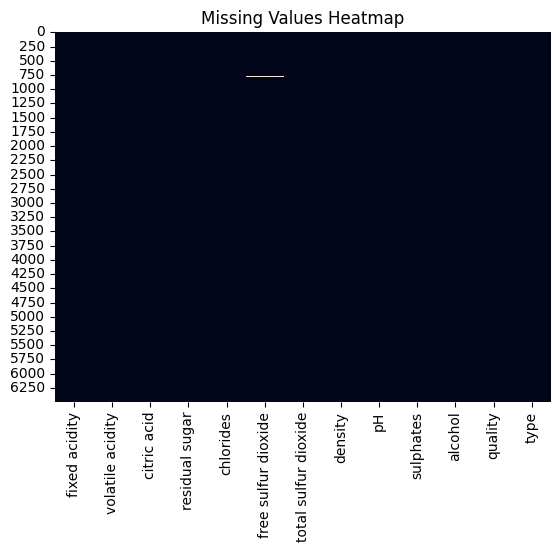

In [5]:
# Missing Values Heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Outlier Detection (Z-score)
numeric_features = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_features]))
(z_scores > 3).sum()

fixed acidity           128
volatile acidity         95
citric acid              28
residual sugar           26
chlorides               107
free sulfur dioxide       0
total sulfur dioxide      0
density                   3
pH                       33
sulphates                75
alcohol                   2
quality                  35
dtype: int64

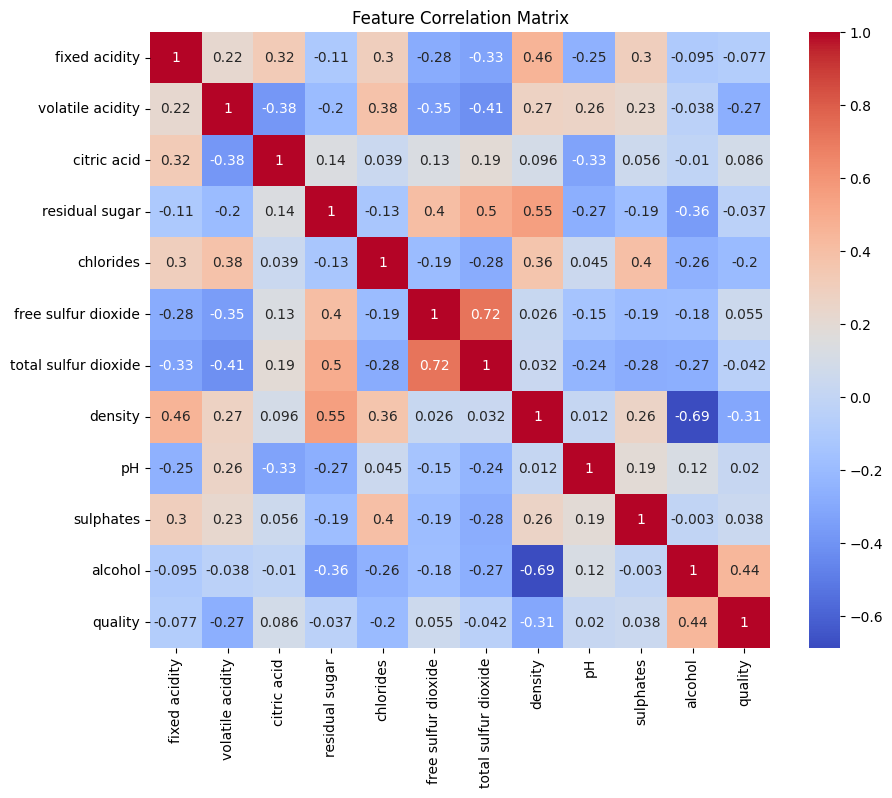

In [7]:
# Correlation Matrix
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
